In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
from py_pcha import PCHA


In [17]:
df_maxs = pd.read_csv('data/df_maxs.csv')
df_parents = pd.read_csv('data/df_max_parents_other_infections.csv').rename(columns = {' cov_weight':'COVID_weight','IAV_weight':'IAV_weight','TB_ave_weight':'TB_weight_loss'})

In [18]:
df_parents

Unnamed: 0  Number       Strain  Max.Parasitemia  Max.Weight.Delta  \
0            0      53          A/J           0.3713               4.3   
1            0      54          A/J           0.3628               3.8   
2            0      55          A/J           0.3413               5.8   
3            0      56          A/J           0.3199               3.9   
4            0      57          A/J           0.3996               4.2   
5            0      58     C57BL/6J           0.3476               4.7   
6            0      59     C57BL/6J           0.2820               1.5   
7            0      60     C57BL/6J           0.3731               3.9   
8            0      61     C57BL/6J           0.1835               3.9   
9            0      62     C57BL/6J           0.4703               4.0   
10           0      63  129S1/SvImJ           0.3590               1.9   
11           0      64  129S1/SvImJ           0.3080               2.5   
12           0      65  129S1/SvImJ           0.3361               2.9   
13           0      66  129S1/SvImJ           0.3188               1.9   
14           0      67  129S1/SvImJ           0.3168               3.0   
15           0      68   NOD/ShiLtJ           0.3414               2.1   
16           0      69   NOD/ShiLtJ           0.3786               1.4   
17           0      70   NOD/ShiLtJ           0.3694               5.1   
18           0      71   NOD/ShiLtJ           0.3694               1.5   
19           0      72   NOD/ShiLtJ           0.4325               3.8   
20           0      73    NZO/HILtJ           0.2459               1.2   
21           0      74    NZO/HILtJ           0.1925               3.0   
22           0      75    NZO/HILtJ           0.2164               2.2   
23           0      76    NZO/HILtJ           0.2755               2.8   
24           0      77    NZO/HILtJ           0.2668               2.5   
25           0      79      PWK/PhJ           0.4751               2.3   
26           0      80      PWK/PhJ           0.5724               0.0   
27           0      82      PWK/PhJ           0.6202               1.6   
28           0      83     CAST/EiJ           0.4676               0.9   
29           0      84     CAST/EiJ           0.5024               1.1   
30           0      85     CAST/EiJ           0.3333               5.4   
31           0      87     CAST/EiJ           0.4539               1.3   
32           0      88      WSB/EiJ           0.0305               0.0   
33           0      89      WSB/EiJ           0.0416               1.0   
34           0      90      WSB/EiJ           0.0353               0.6   
35           0      91      WSB/EiJ           0.0042               0.4   
36           0      92      WSB/EiJ           0.3004               0.9   
37           0     169      PWK/PhJ           0.6325               0.9   
38           0     170      PWK/PhJ           0.7115               1.7   
39           0     171      PWK/PhJ           0.5996               3.1   
40           0     172      PWK/PhJ           0.6104               3.5   

    Max.RBC.Delta  Max.Temp.Delta  Immune.Intensity  Max.Parasitemia.zscore  \
0         13098.0             8.9         4315.7076                0.714944   
1         14123.0            12.3         4614.1360                0.640494   
2         12395.0            10.9         5476.9058                0.452180   
3         12327.0             8.9         8460.2790                0.264742   
4         16462.0            12.2         3638.3020                0.962817   
5         14968.0            14.9         3009.5390                0.507360   
6         11939.0             4.7         3782.7724               -0.067216   
7         13721.0             7.2         2857.3931                0.730709   
8         12073.0             8.5         2734.0000               -0.929956   
9         14666.0             9.6         3353.9709                1.582063   
10        12461.0         

In [19]:
colors = ['tab:blue','tab:orange','tab:green','tab:red']
markers = ['o','^','s','*']
edgecolors = {'tab:blue':'#103c5a','tab:orange':'#804007','tab:green':'#165016','tab:red':'#6b1414'}
sizes = [500,500,500,600]
def plot_archetypes_2d (arcs,ax,dim_1,dim_2,labels = ['','','','']):
    for arc,color,marker,s,l in zip(arcs,colors,markers,sizes,labels):
        ax.scatter(arc[dim_1],arc[dim_2],c = color, s = s, marker = marker, edgecolors = edgecolors[color],label = l,zorder = 1)

def plot_archetypes_3d (arcs,ax,labels = ['','','','']):
    for arc,color,marker,s,l in zip(arcs,colors,markers,sizes,labels):
        ax.scatter(arc[2],arc[0],arc[1],c = color, s = s, marker = marker, edgecolors = edgecolors[color],label = l,zorder = 1)


IAV_log_titre


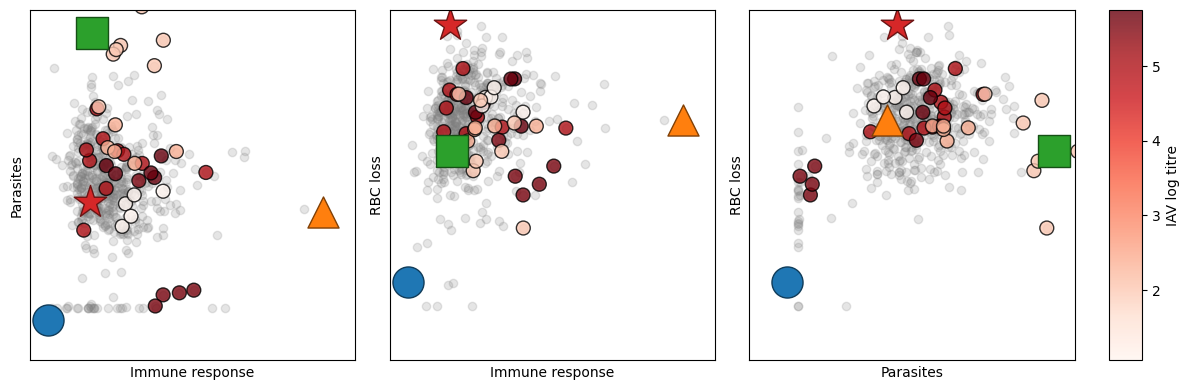

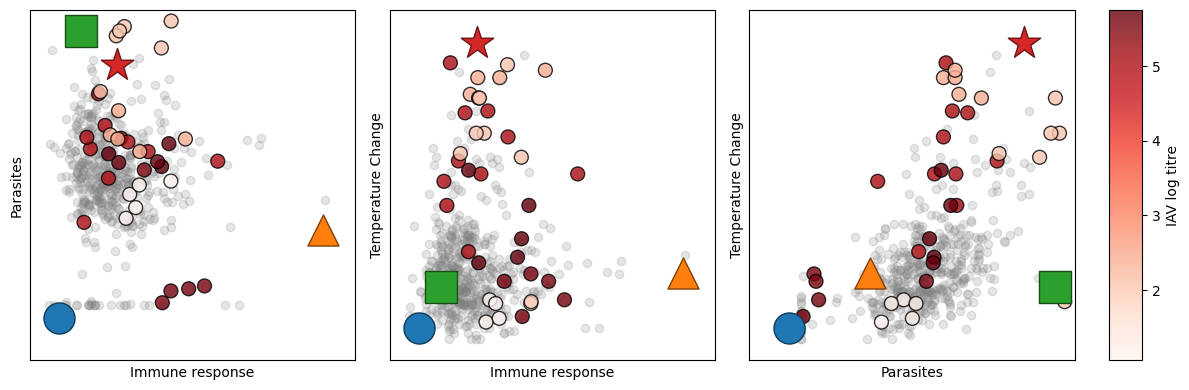

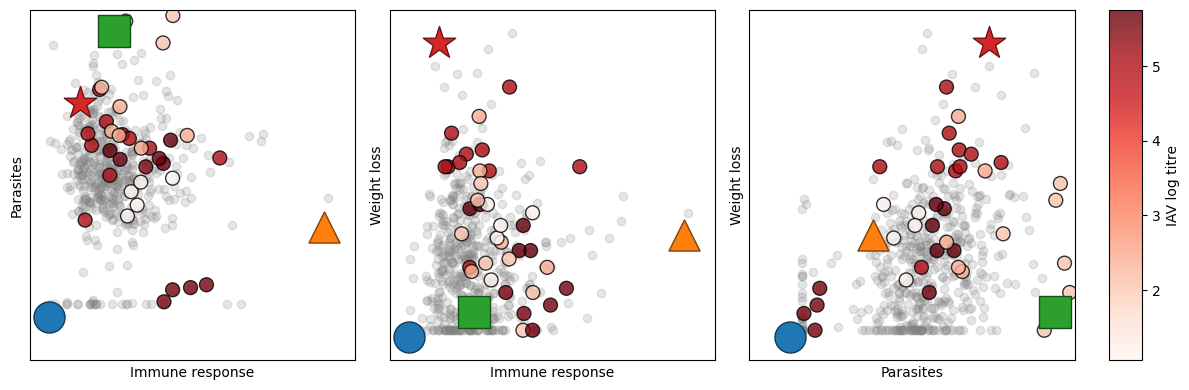

IAV_weight


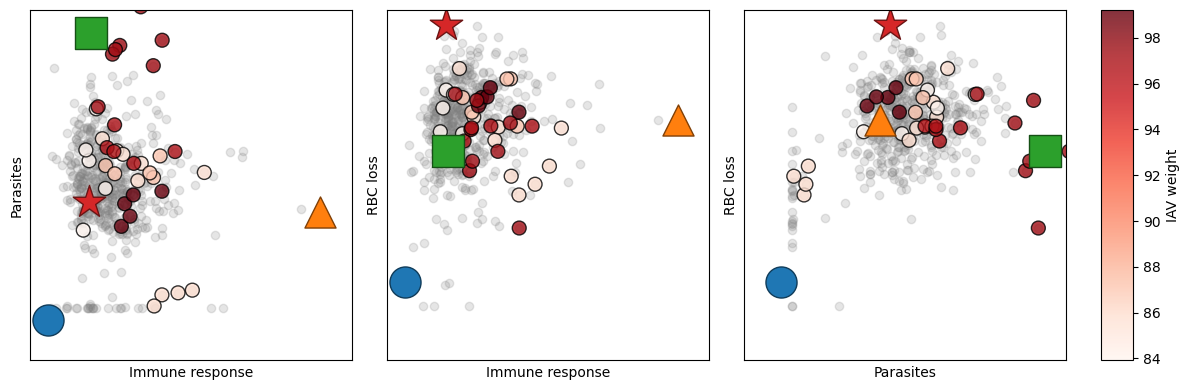

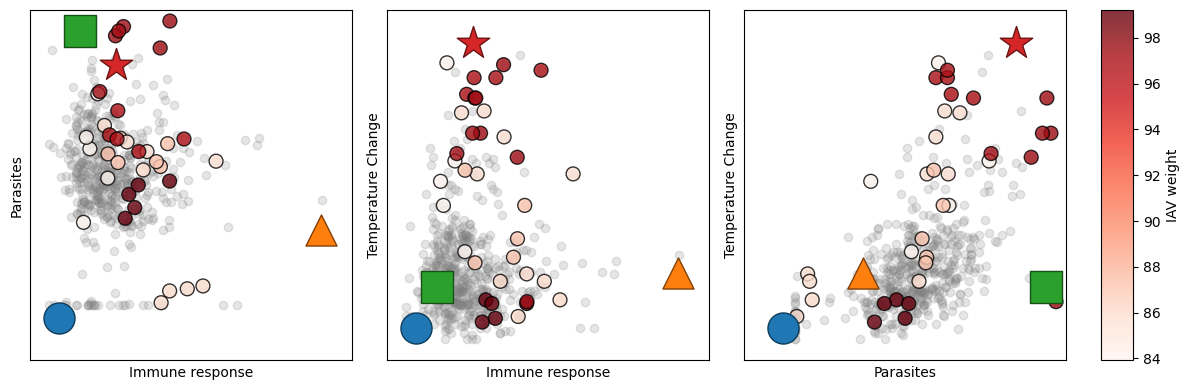

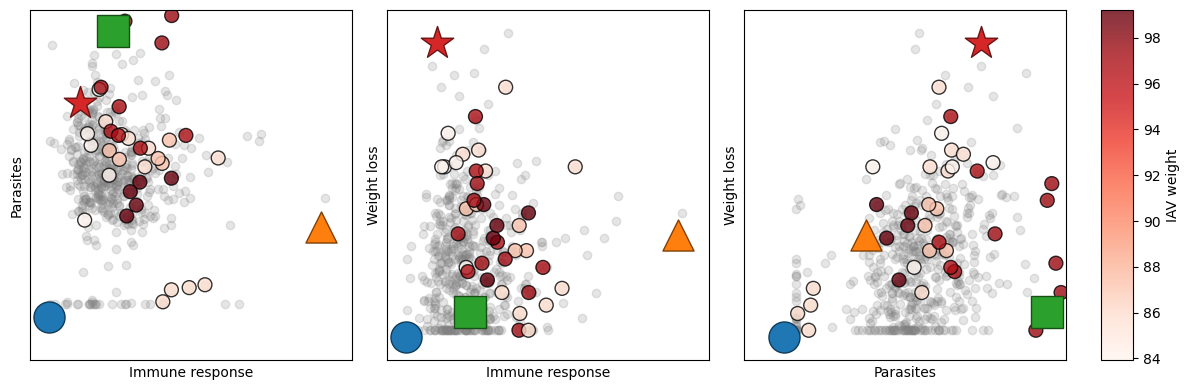

IAV_clinical


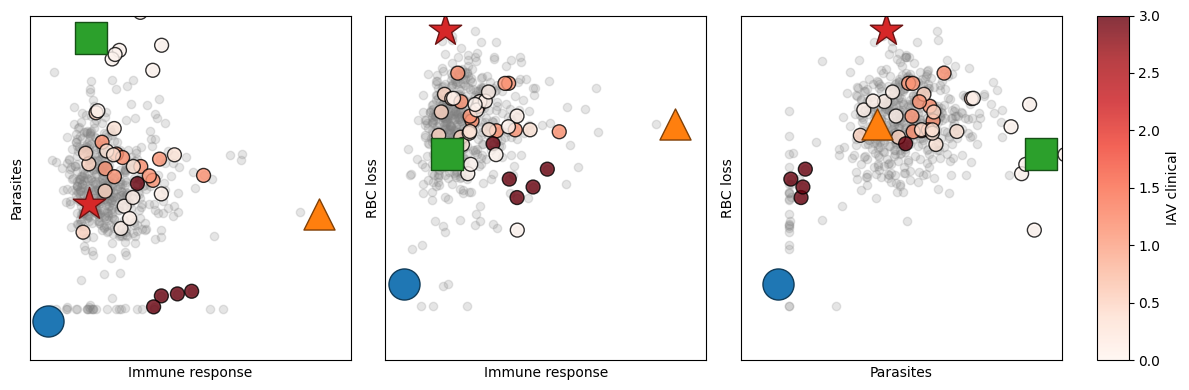

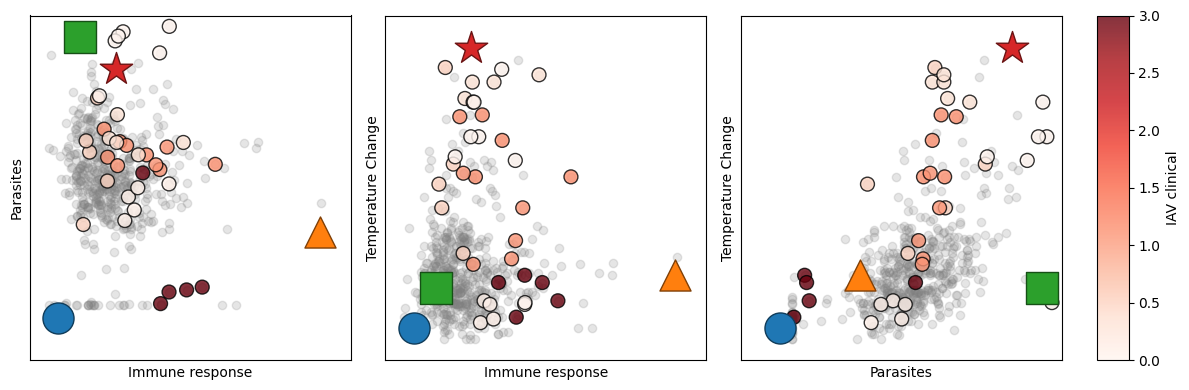

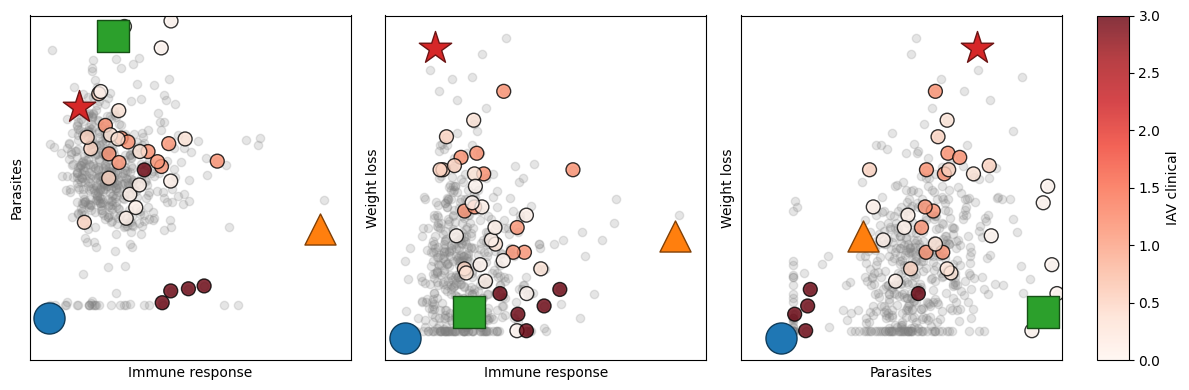

IAV_airway_infiltration


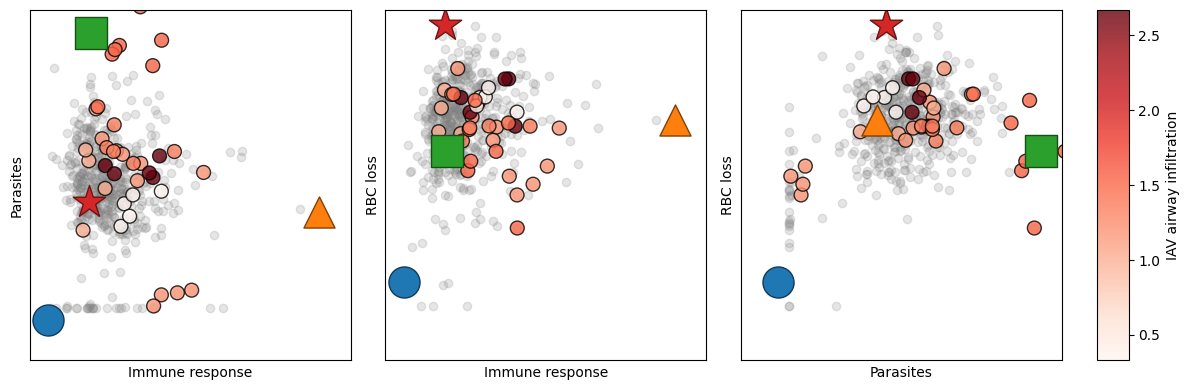

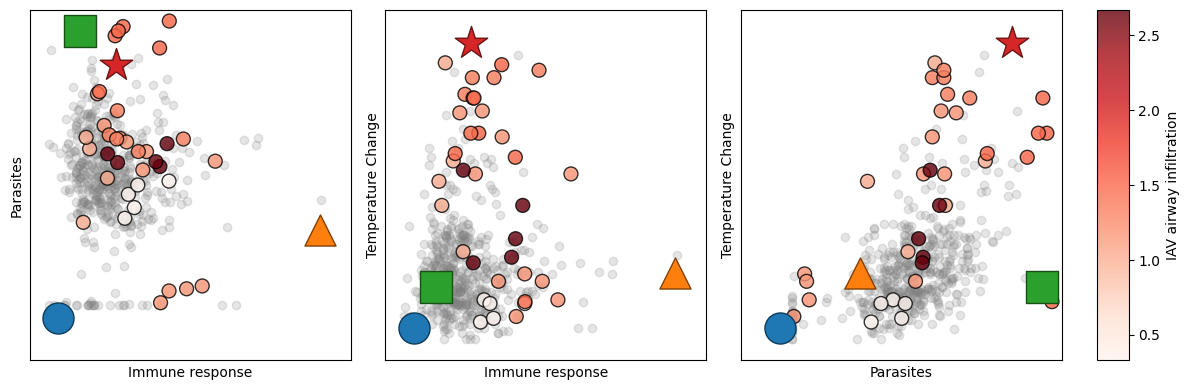

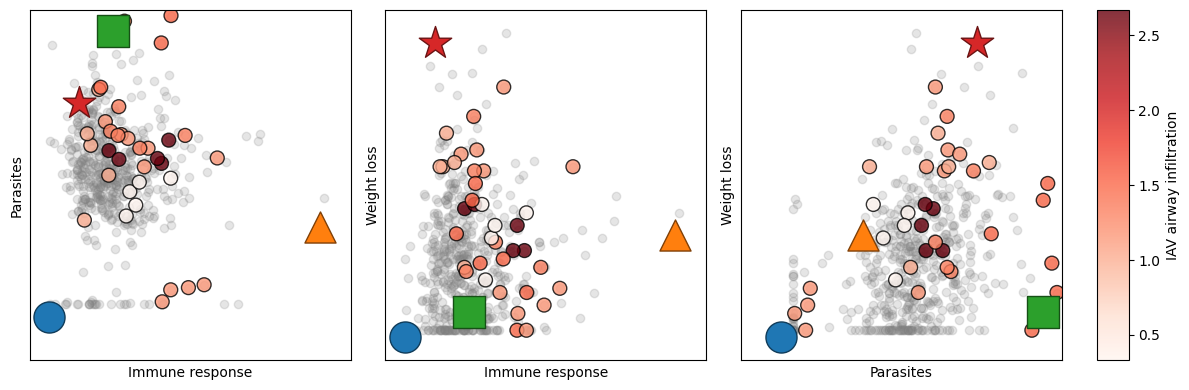

cov_titre


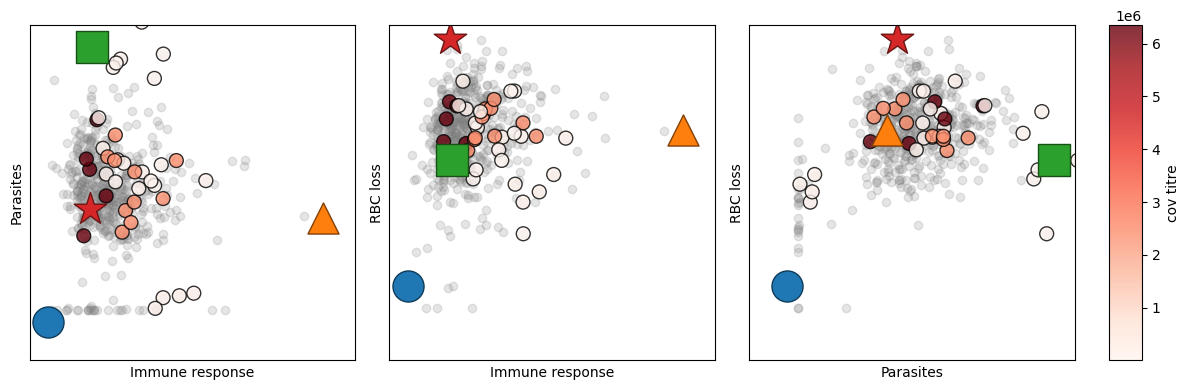

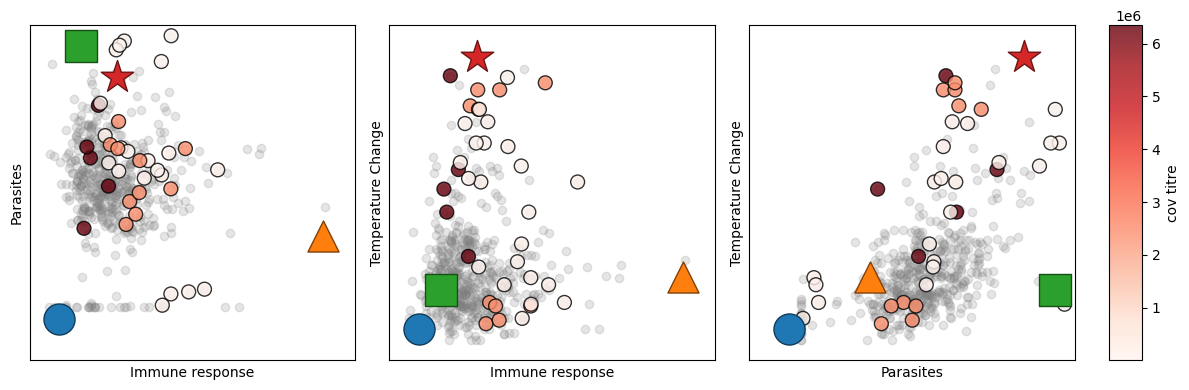

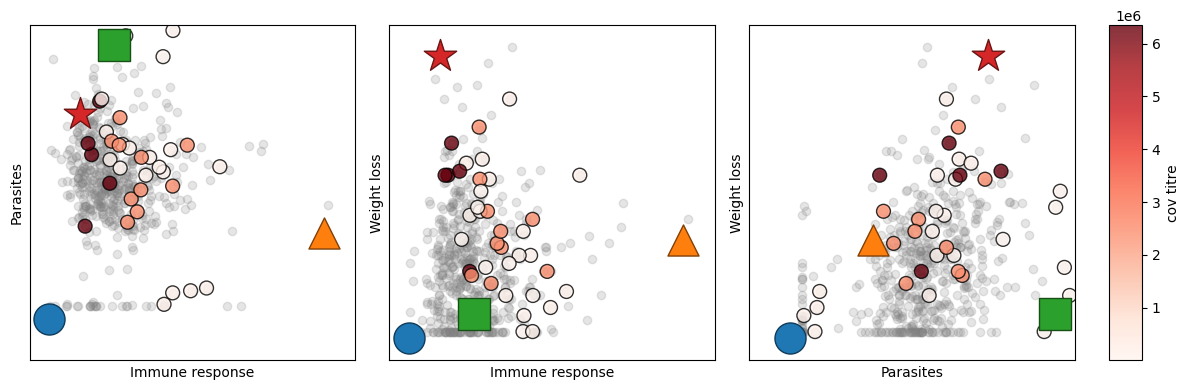

COVID_weight


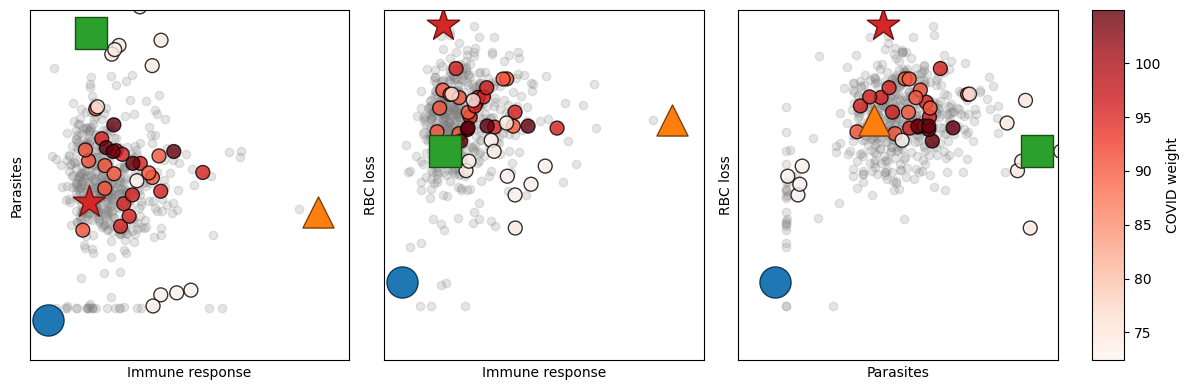

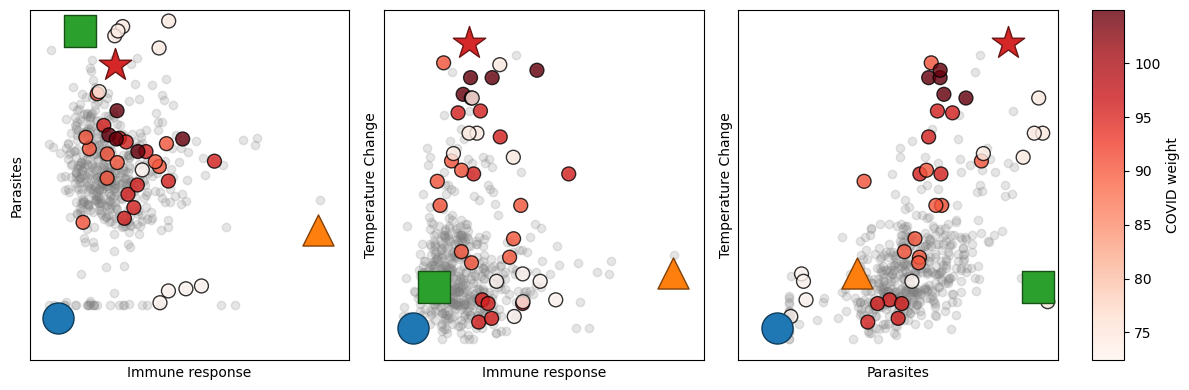

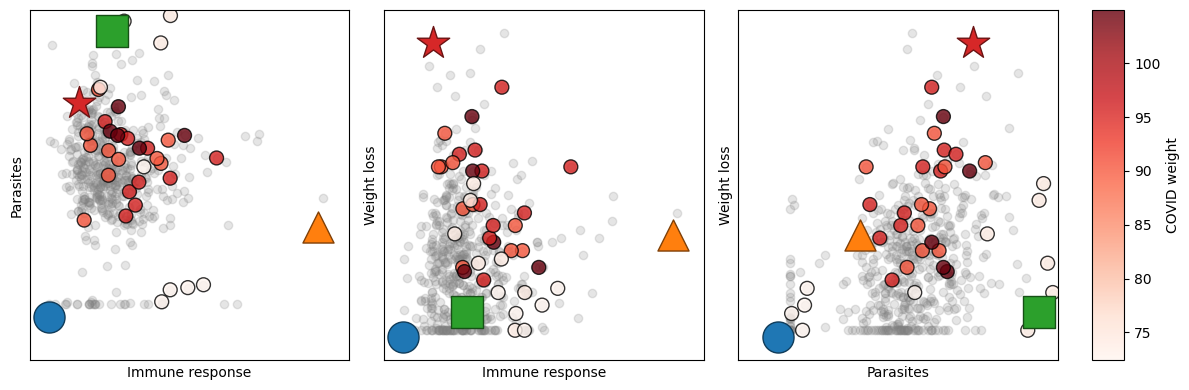

cov_survival


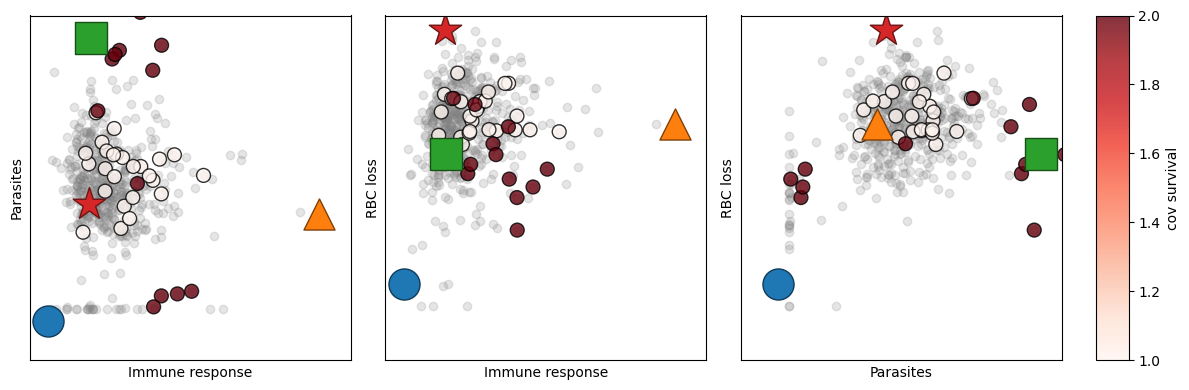

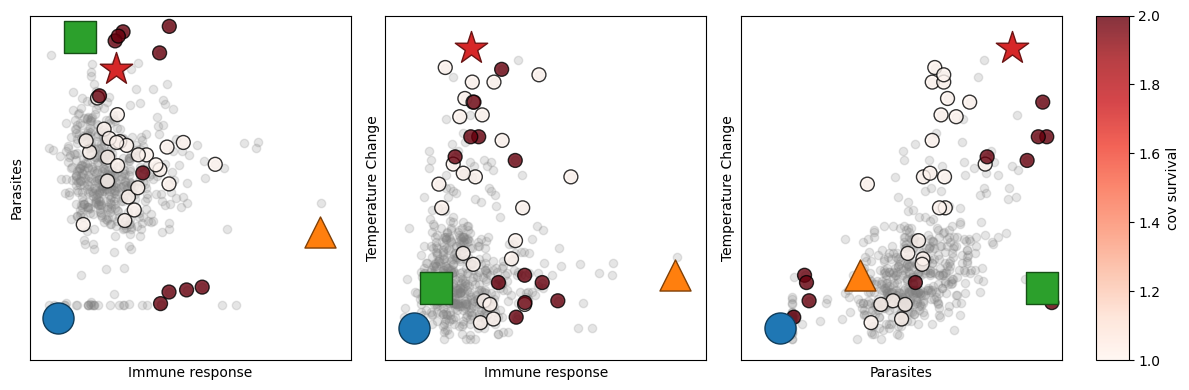

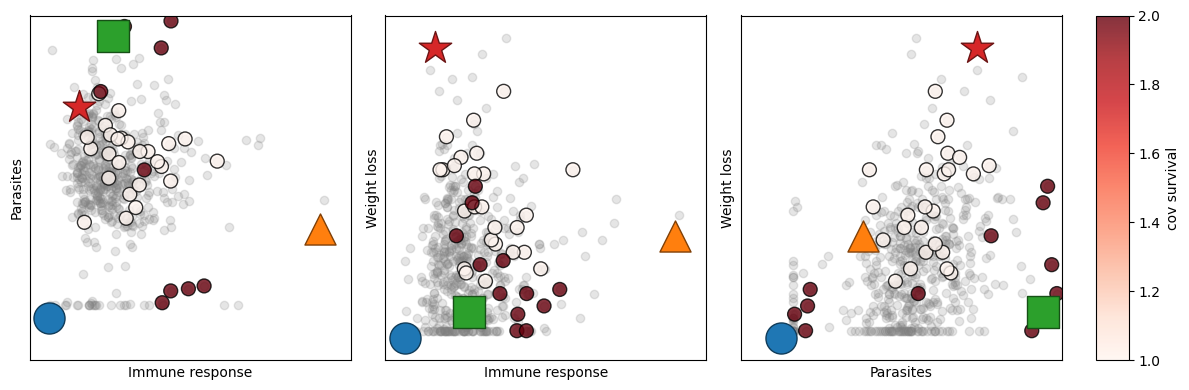

TB_weight_loss


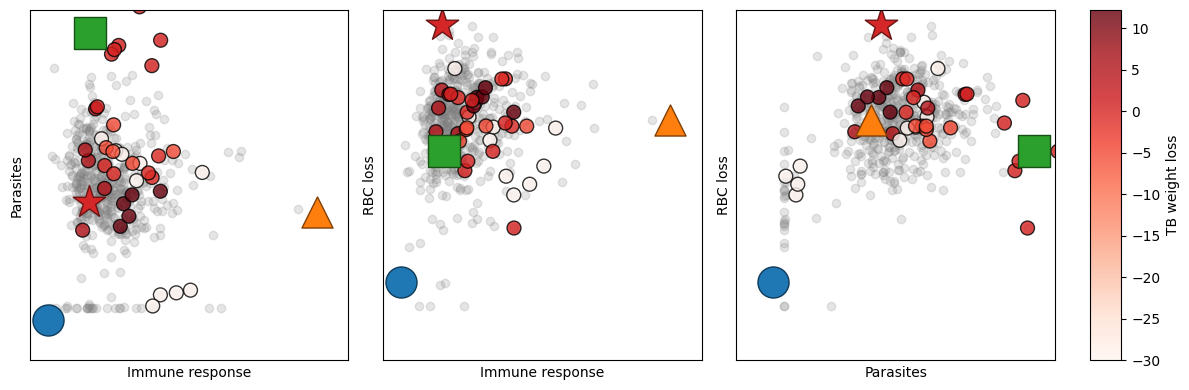

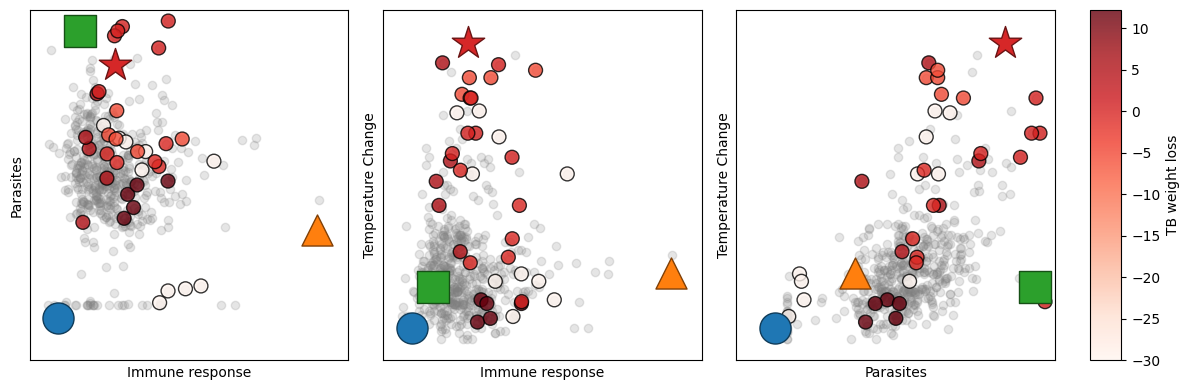

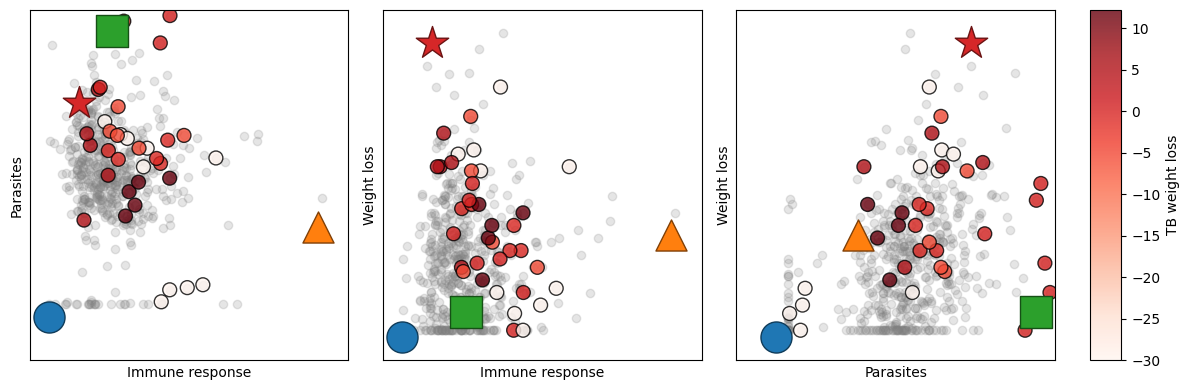

TB_ave_log_spleen_cfu


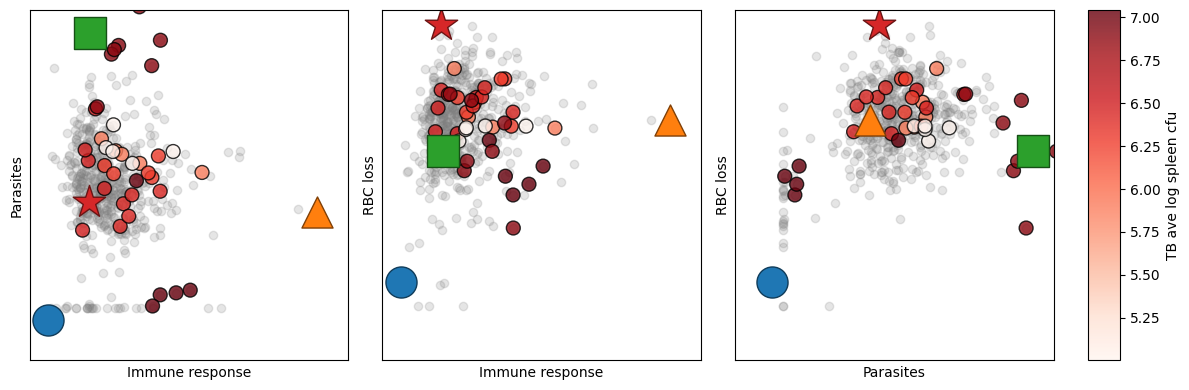

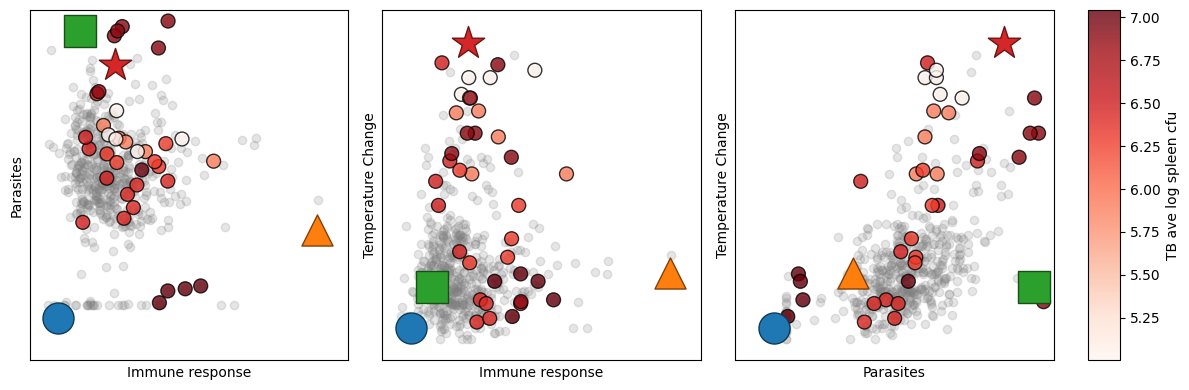

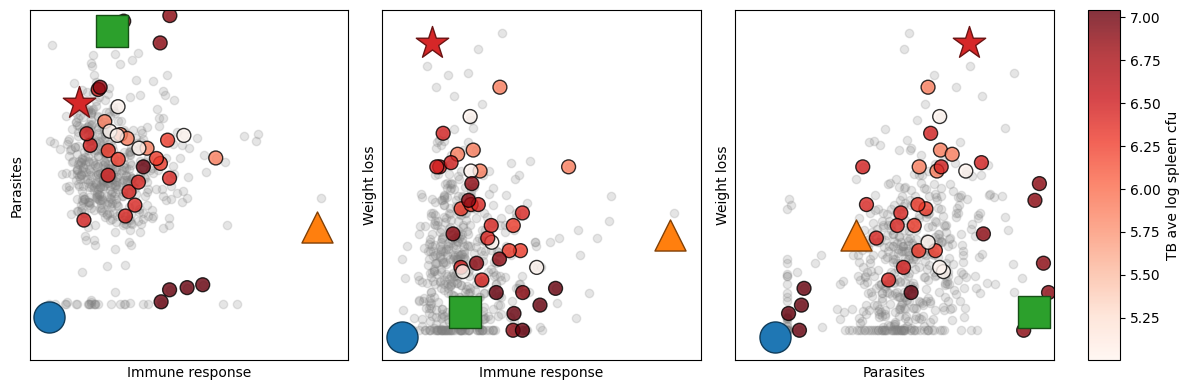

TB_ave_log_lung_cfu


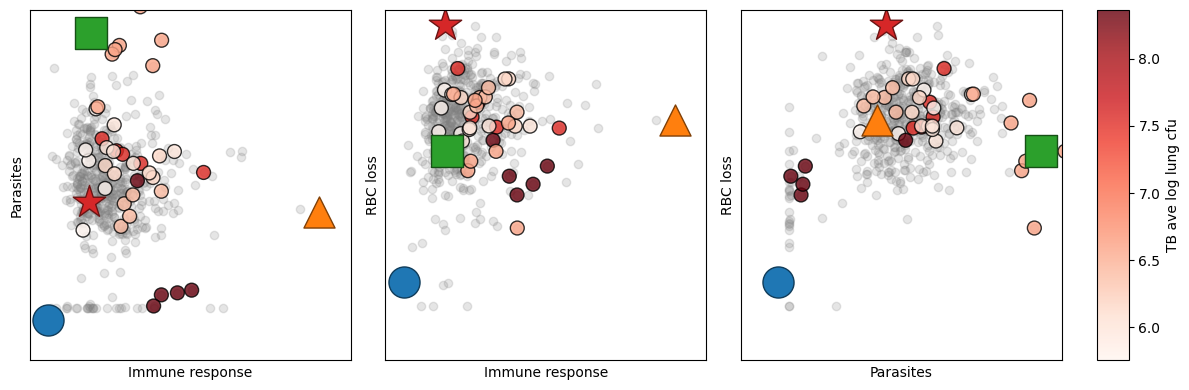

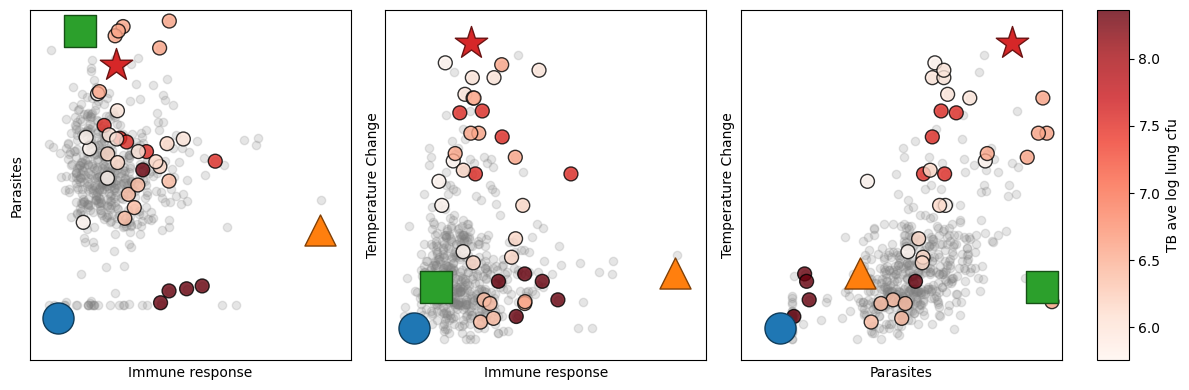

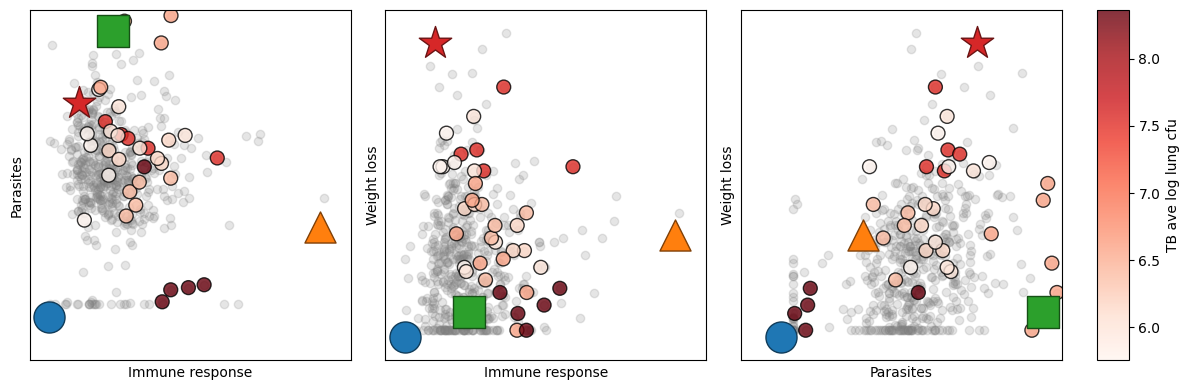

In [20]:
np.random.seed(7)
labels = ['arc 1','arc 2','arc 3','arc 4']

Ds = ['RBC','Temp','Weight']
D_labels = ['RBC loss','Temperature Change', 'Weight loss']
def sort_archetypes (arcs):
    inds = []
    arcs_remain = arcs.copy()
    arcs_ret = []
    inds.append(np.argmin(arcs_remain[:, 2]))
    arcs_ret.append(arcs_remain[inds[-1]])
    arcs_remain = np.delete(arcs,inds,0)
    inds.append(np.argmax(arcs_remain[:, 2]))
    arcs_ret.append(arcs_remain[inds[-1]])
    arcs_remain = np.delete(arcs_remain,inds[-1],0)
    inds.append(np.argmax(arcs_remain[:, 0]))
    arcs_ret.append(arcs_remain[inds[-1]])
    arcs_remain = np.delete(arcs_remain,inds[-1],0)
    inds.append(np.argmax(arcs_remain[:, 1]))
    arcs_ret.append(arcs_remain[inds[-1]])
    return np.array(arcs_ret)

others = df_parents.columns[-10:]
%matplotlib inline
for o in others:
    print(o)
    for D_name,D_lab in zip(Ds,D_labels):
        gridspec = {'width_ratios': [1, 1, 1, 0.1]}
        fig, axs = plt.subplots(1, 4, figsize=(12, 4), gridspec_kw=gridspec)
        damage_col_name = f'Max.{D_name}.Delta.zscore'
        MDI = np.array([df_maxs['Max.Parasitemia.zscore'],df_maxs[damage_col_name],df_maxs['Immune.Intensity.zscore']]).transpose()
        M = df_maxs['Max.Parasitemia.zscore']
        M_parents = df_parents['Max.Parasitemia.zscore']
        D = df_maxs[damage_col_name]
        D_parents = df_parents[damage_col_name]
        I = df_maxs['Immune.Intensity.zscore']
        I_parents = df_parents['Immune.Intensity.zscore']

        XC, S, C, SSE, varexpl = PCHA(MDI.transpose(), noc=4, delta=0.1)
        arcs = np.array(XC.transpose())
        arcs = sort_archetypes(arcs)
        arc1 = arcs[0]
        arc2 = arcs[1]
        arc3 = arcs[2]
        arc4 = arcs[3]
        axs[0].set_xlabel('Immune response')
        axs[0].set_ylabel('Parasites')
        axs[0].scatter(I, M,c='grey',alpha = 0.2,zorder = -1)
        plot_archetypes_2d(arcs,axs[0],2,0,)
        axs[0].scatter(I_parents,M_parents,c = df_parents[o], s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)
        axs[0].set_xlim(min(arcs[:,2].min(),I.min())*1.3,arcs[:,2].max()*1.15)
        axs[0].set_ylim(min(arcs[:,0].min(),M.min())*1.3,arcs[:,0].max()*1.15)

        axs[1].set_xlabel('Immune response')
        axs[1].set_ylabel(D_lab)
        axs[1].scatter(I, D,c = 'grey', alpha = 0.2,zorder = -1)
        plot_archetypes_2d(arcs,axs[1],2,1,)
        axs[1].scatter(I_parents,D_parents,c = df_parents[o], s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)
        axs[1].set_xlim(min(arcs[:,2].min(),I.min())*1.3,arcs[:,2].max()*1.15)
        axs[1].set_ylim(min(arcs[:,1].min(),D.min())*1.3,arcs[:,1].max()*1.15)

        axs[2].set_xlabel('Parasites')
        axs[2].set_ylabel(D_lab)
        axs[2].scatter(M, D,c='grey',alpha = 0.2,zorder = -1)
        plot_archetypes_2d(arcs,axs[2],0,1,)
        im = axs[2].scatter(M_parents,D_parents,c = df_parents[o], s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)
        plt.colorbar(im, cax=axs[3],label = o.replace("_"," "))
        axs[2].set_xlim(min(arcs[:,0].min(),M.min())*1.3,arcs[:,0].max()*1.15)
        axs[2].set_ylim(min(arcs[:,1].min(),D.min())*1.3,arcs[:,1].max()*1.15)

        for ax in axs:
            ax.tick_params(left = False,bottom=False, labelbottom = False, labelleft =False) 

        fig.tight_layout()
        fig.savefig(f'3ABC_D_{D_name}_other_infection_{o}.png',dpi = 600,bbox_inches = 'tight')
        if D_name=='Weight':
            fig.savefig(f'3ABC_D_{D_name}_other_infection_{o}.png',dpi = 600,bbox_inches = 'tight')

        plt.show()

In [21]:
df_parents.columns

Index(['Unnamed: 0', 'Number', 'Strain', 'Max.Parasitemia', 'Max.Weight.Delta',
       'Max.RBC.Delta', 'Max.Temp.Delta', 'Immune.Intensity',
       'Max.Parasitemia.zscore', 'Max.Weight.Delta.zscore',
       'Max.RBC.Delta.zscore', 'Max.Temp.Delta.zscore',
       'Immune.Intensity.zscore', 'IAV_log_titre', 'IAV_weight',
       'IAV_clinical', 'IAV_airway_infiltration', 'cov_titre', 'COVID_weight',
       'cov_survival', 'TB_weight_loss', 'TB_ave_log_spleen_cfu',
       'TB_ave_log_lung_cfu'],
      dtype='object')

IAV_weight
         Strain    color  IAV_weight
9      C57BL/6J  #67000d       83.91
8      C57BL/6J  #67000d       83.91
7      C57BL/6J  #67000d       83.91
6      C57BL/6J  #67000d       83.91
5      C57BL/6J  #67000d       83.91
4           A/J  #aa1016       85.70
2           A/J  #aa1016       85.70
1           A/J  #aa1016       85.70
0           A/J  #aa1016       85.70
3           A/J  #aa1016       85.70
33      WSB/EiJ  #d52221       85.83
36      WSB/EiJ  #d52221       85.83
35      WSB/EiJ  #d52221       85.83
34      WSB/EiJ  #d52221       85.83
32      WSB/EiJ  #d52221       85.83
14  129S1/SvImJ  #f44f39       87.09
12  129S1/SvImJ  #f44f39       87.09
13  129S1/SvImJ  #f44f39       87.09
10  129S1/SvImJ  #f44f39       87.09
11  129S1/SvImJ  #f44f39       87.09
18   NOD/ShiLtJ  #fc8161       96.86
19   NOD/ShiLtJ  #fc8161       96.86
17   NOD/ShiLtJ  #fc8161       96.86
16   NOD/ShiLtJ  #fc8161       96.86
15   NOD/ShiLtJ  #fc8161       96.86
27      PWK/PhJ  #fcaf94   

/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_16090/2545508156.py:65: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[0].scatter(I_parents,M_parents,c = colors_o, s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)
/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_16090/2545508156.py:73: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[1].scatter(I_parents,D_parents,c = colors_o, s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)
/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_16090/2545508156.py:81: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  im = axs[2].scatter(M_parents,D_parents,c = colors_o, s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)


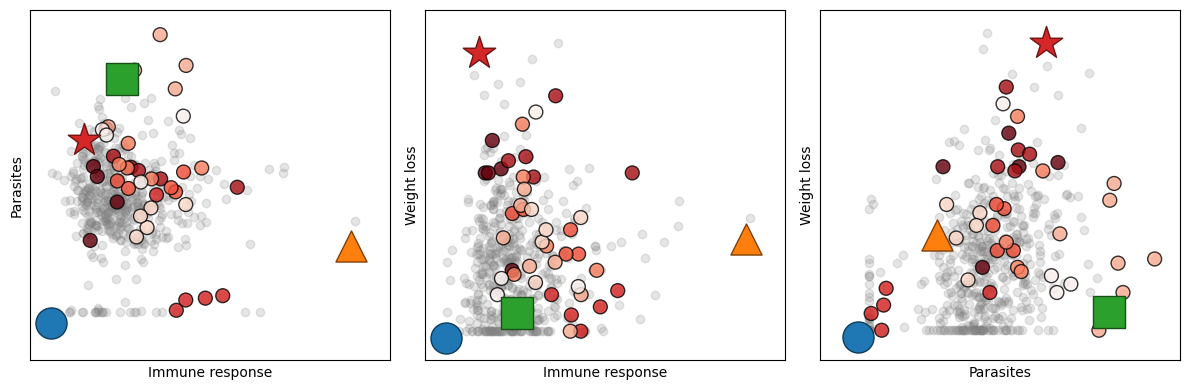

COVID_weight
         Strain    color  COVID_weight
32      WSB/EiJ  #67000d         72.39
34      WSB/EiJ  #67000d         72.39
33      WSB/EiJ  #67000d         72.39
36      WSB/EiJ  #67000d         72.39
35      WSB/EiJ  #67000d         72.39
25      PWK/PhJ  #aa1016         73.81
26      PWK/PhJ  #aa1016         73.81
39      PWK/PhJ  #aa1016         73.81
27      PWK/PhJ  #aa1016         73.81
38      PWK/PhJ  #aa1016         73.81
40      PWK/PhJ  #aa1016         73.81
37      PWK/PhJ  #aa1016         73.81
13  129S1/SvImJ  #d52221         90.15
14  129S1/SvImJ  #d52221         90.15
10  129S1/SvImJ  #d52221         90.15
12  129S1/SvImJ  #d52221         90.15
11  129S1/SvImJ  #d52221         90.15
5      C57BL/6J  #f44f39         90.35
6      C57BL/6J  #f44f39         90.35
8      C57BL/6J  #f44f39         90.35
9      C57BL/6J  #f44f39         90.35
7      C57BL/6J  #f44f39         90.35
24    NZO/HILtJ  #fc8161         95.59
23    NZO/HILtJ  #fc8161         95.59
22    NZO/HI

/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_16090/2545508156.py:65: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[0].scatter(I_parents,M_parents,c = colors_o, s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)
/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_16090/2545508156.py:73: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[1].scatter(I_parents,D_parents,c = colors_o, s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)
/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_16090/2545508156.py:81: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  im = axs[2].scatter(M_parents,D_parents,c = colors_o, s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)


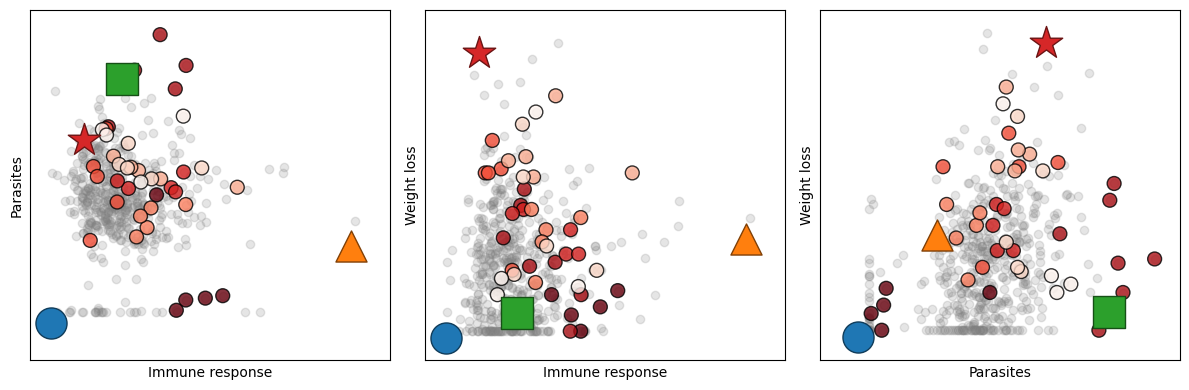

TB_weight_loss
         Strain    color  TB_weight_loss
32      WSB/EiJ  #67000d      -30.000000
34      WSB/EiJ  #67000d      -30.000000
33      WSB/EiJ  #67000d      -30.000000
36      WSB/EiJ  #67000d      -30.000000
35      WSB/EiJ  #67000d      -30.000000
4           A/J  #aa1016      -29.800000
1           A/J  #aa1016      -29.800000
2           A/J  #aa1016      -29.800000
0           A/J  #aa1016      -29.800000
3           A/J  #aa1016      -29.800000
17   NOD/ShiLtJ  #d52221       -5.606000
16   NOD/ShiLtJ  #d52221       -5.606000
15   NOD/ShiLtJ  #d52221       -5.606000
19   NOD/ShiLtJ  #d52221       -5.606000
18   NOD/ShiLtJ  #d52221       -5.606000
13  129S1/SvImJ  #f44f39       -1.134333
14  129S1/SvImJ  #f44f39       -1.134333
10  129S1/SvImJ  #f44f39       -1.134333
12  129S1/SvImJ  #f44f39       -1.134333
11  129S1/SvImJ  #f44f39       -1.134333
40      PWK/PhJ  #fc8161        0.170333
38      PWK/PhJ  #fc8161        0.170333
37      PWK/PhJ  #fc8161        0.170333
3

/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_16090/2545508156.py:65: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[0].scatter(I_parents,M_parents,c = colors_o, s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)
/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_16090/2545508156.py:73: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[1].scatter(I_parents,D_parents,c = colors_o, s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)
/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_16090/2545508156.py:81: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  im = axs[2].scatter(M_parents,D_parents,c = colors_o, s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)


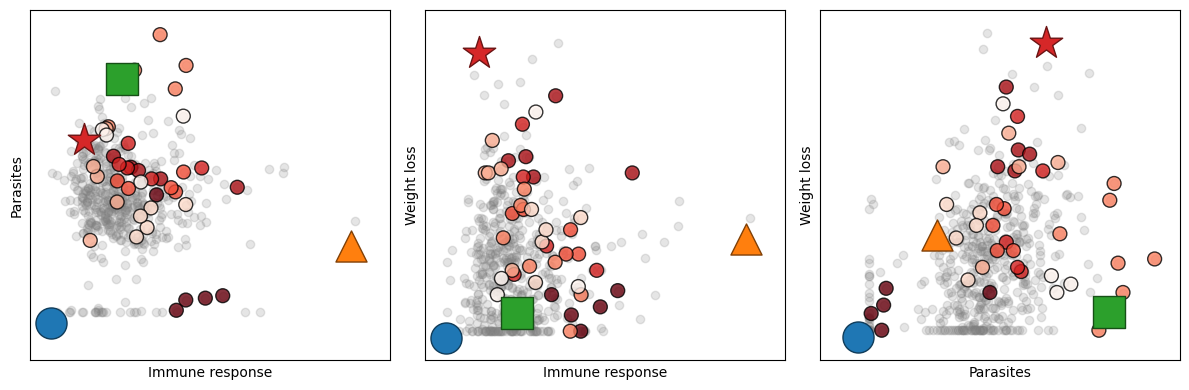

In [22]:
np.random.seed(7)
labels = ['arc 1','arc 2','arc 3','arc 4']

Ds = ['Weight']
D_labels = ['Weight loss']
def sort_archetypes (arcs):
    inds = []
    arcs_remain = arcs.copy()
    arcs_ret = []
    inds.append(np.argmin(arcs_remain[:, 2]))
    arcs_ret.append(arcs_remain[inds[-1]])
    arcs_remain = np.delete(arcs,inds,0)
    inds.append(np.argmax(arcs_remain[:, 2]))
    arcs_ret.append(arcs_remain[inds[-1]])
    arcs_remain = np.delete(arcs_remain,inds[-1],0)
    inds.append(np.argmax(arcs_remain[:, 0]))
    arcs_ret.append(arcs_remain[inds[-1]])
    arcs_remain = np.delete(arcs_remain,inds[-1],0)
    inds.append(np.argmax(arcs_remain[:, 1]))
    arcs_ret.append(arcs_remain[inds[-1]])
    return np.array(arcs_ret)

others = df_parents.columns[-10:]
%matplotlib inline
colormap = plt.cm.get_cmap('Reds')
import matplotlib.colors as mcolors

for o in others:
    if 'weight' in o:
        print(o)
        df_parents = df_parents.sort_values(by = o)
        unique_values = df_parents[o].unique()
        num_unique = len(unique_values)
        colormap = plt.cm.get_cmap('Reds_r', num_unique)
        color_map = {value: mcolors.to_hex(colormap(i)) for i, value in enumerate(unique_values)}

        # Map the colors to the DataFrame column
        row_colors = df_parents[o].map(color_map)

        # Convert the resulting Series to a NumPy array (optional)
        colors_o = row_colors.to_numpy()
        for D_name,D_lab in zip(Ds,D_labels):
            
            fig, axs = plt.subplots(1, 3, figsize=(12, 4))
            damage_col_name = f'Max.{D_name}.Delta.zscore'
            MDI = np.array([df_maxs['Max.Parasitemia.zscore'],df_maxs[damage_col_name],df_maxs['Immune.Intensity.zscore']]).transpose()
            M = df_maxs['Max.Parasitemia.zscore']
            M_parents = df_parents['Max.Parasitemia.zscore']
            D = df_maxs[damage_col_name]
            D_parents = df_parents[damage_col_name]
            I = df_maxs['Immune.Intensity.zscore']
            I_parents = df_parents['Immune.Intensity.zscore']

            XC, S, C, SSE, varexpl = PCHA(MDI.transpose(), noc=4, delta=0.1)
            arcs = np.array(XC.transpose())
            arcs = sort_archetypes(arcs)
            arc1 = arcs[0]
            arc2 = arcs[1]
            arc3 = arcs[2]
            arc4 = arcs[3]
            axs[0].set_xlabel('Immune response')
            axs[0].set_ylabel('Parasites')
            axs[0].scatter(I, M,c='grey',alpha = 0.2,zorder = -1)
            plot_archetypes_2d(arcs,axs[0],2,0,)
            axs[0].scatter(I_parents,M_parents,c = colors_o, s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)
            axs[0].set_xlim(min(arcs[:,2].min(),I.min())*1.3,max(arcs[:,2].max(),I.max())*1.15)
            axs[0].set_ylim(min(arcs[:,0].min(),M.min())*1.3,max(arcs[:,0].max(),M.max())*1.15)

            axs[1].set_xlabel('Immune response')
            axs[1].set_ylabel(D_lab)
            axs[1].scatter(I, D,c = 'grey', alpha = 0.2,zorder = -1)
            plot_archetypes_2d(arcs,axs[1],2,1,)
            axs[1].scatter(I_parents,D_parents,c = colors_o, s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)
            axs[1].set_xlim(min(arcs[:,2].min(),I.min())*1.3,max(arcs[:,2].max(),I.max())*1.15)
            axs[1].set_ylim(min(arcs[:,1].min(),D.min())*1.3,max(arcs[:,1].max(),D.max())*1.15)

            axs[2].set_xlabel('Parasites')
            axs[2].set_ylabel(D_lab)
            axs[2].scatter(M, D,c='grey',alpha = 0.2,zorder = -1)
            plot_archetypes_2d(arcs,axs[2],0,1,)
            im = axs[2].scatter(M_parents,D_parents,c = colors_o, s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)
            #plt.colorbar(im, cax=axs[3],label = o.replace("_"," "))
            axs[2].set_xlim(min(arcs[:,0].min(),M.min())*1.3,max(arcs[:,0].max(),M.max())*1.15)
            axs[2].set_ylim(min(arcs[:,1].min(),D.min())*1.3,max(arcs[:,1].max(),M.max())*1.15)

            for ax in axs:
                ax.tick_params(left = False,bottom=False, labelbottom = False, labelleft =False) 

            df_o = df_parents.copy()
            df_o['color'] = colors_o
            df_o = df_o.sort_values(by = o)
            print(df_o[['Strain','color',o]].to_string())
            
            fig.tight_layout()
            
            fig.savefig(f'3ABC_D_{D_name}_other_infection_{o}.png',dpi = 600,bbox_inches = 'tight')
            fig.savefig(f'3ABC_D_{D_name}_other_infection_{o}.pdf',dpi = 600,bbox_inches = 'tight')

            plt.show()

IAV_weight
         Strain    color  IAV_weight
8      C57BL/6J  #67000d       83.91
5      C57BL/6J  #67000d       83.91
6      C57BL/6J  #67000d       83.91
7      C57BL/6J  #67000d       83.91
9      C57BL/6J  #67000d       83.91
4           A/J  #aa1016       85.70
3           A/J  #aa1016       85.70
1           A/J  #aa1016       85.70
2           A/J  #aa1016       85.70
0           A/J  #aa1016       85.70
32      WSB/EiJ  #d52221       85.83
35      WSB/EiJ  #d52221       85.83
36      WSB/EiJ  #d52221       85.83
33      WSB/EiJ  #d52221       85.83
34      WSB/EiJ  #d52221       85.83
11  129S1/SvImJ  #f44f39       87.09
10  129S1/SvImJ  #f44f39       87.09
12  129S1/SvImJ  #f44f39       87.09
13  129S1/SvImJ  #f44f39       87.09
14  129S1/SvImJ  #f44f39       87.09
18   NOD/ShiLtJ  #fc8161       96.86
19   NOD/ShiLtJ  #fc8161       96.86
15   NOD/ShiLtJ  #fc8161       96.86
16   NOD/ShiLtJ  #fc8161       96.86
17   NOD/ShiLtJ  #fc8161       96.86
37      PWK/PhJ  #fcaf94   

/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_16090/29551365.py:41: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(I_parents,M_parents,D_parents,c = colors_o, s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)


COVID_weight
         Strain    color  COVID_weight
34      WSB/EiJ  #67000d         72.39
33      WSB/EiJ  #67000d         72.39
32      WSB/EiJ  #67000d         72.39
35      WSB/EiJ  #67000d         72.39
36      WSB/EiJ  #67000d         72.39
40      PWK/PhJ  #aa1016         73.81
38      PWK/PhJ  #aa1016         73.81
39      PWK/PhJ  #aa1016         73.81
37      PWK/PhJ  #aa1016         73.81
26      PWK/PhJ  #aa1016         73.81
25      PWK/PhJ  #aa1016         73.81
27      PWK/PhJ  #aa1016         73.81
12  129S1/SvImJ  #d52221         90.15
11  129S1/SvImJ  #d52221         90.15
13  129S1/SvImJ  #d52221         90.15
10  129S1/SvImJ  #d52221         90.15
14  129S1/SvImJ  #d52221         90.15
9      C57BL/6J  #f44f39         90.35
7      C57BL/6J  #f44f39         90.35
5      C57BL/6J  #f44f39         90.35
8      C57BL/6J  #f44f39         90.35
6      C57BL/6J  #f44f39         90.35
23    NZO/HILtJ  #fc8161         95.59
22    NZO/HILtJ  #fc8161         95.59
20    NZO/HI

/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_16090/29551365.py:41: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(I_parents,M_parents,D_parents,c = colors_o, s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)


TB_weight_loss


/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_16090/29551365.py:41: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(I_parents,M_parents,D_parents,c = colors_o, s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)


         Strain    color  TB_weight_loss
34      WSB/EiJ  #67000d      -30.000000
33      WSB/EiJ  #67000d      -30.000000
32      WSB/EiJ  #67000d      -30.000000
35      WSB/EiJ  #67000d      -30.000000
36      WSB/EiJ  #67000d      -30.000000
4           A/J  #aa1016      -29.800000
1           A/J  #aa1016      -29.800000
3           A/J  #aa1016      -29.800000
2           A/J  #aa1016      -29.800000
0           A/J  #aa1016      -29.800000
15   NOD/ShiLtJ  #d52221       -5.606000
16   NOD/ShiLtJ  #d52221       -5.606000
17   NOD/ShiLtJ  #d52221       -5.606000
19   NOD/ShiLtJ  #d52221       -5.606000
18   NOD/ShiLtJ  #d52221       -5.606000
12  129S1/SvImJ  #f44f39       -1.134333
11  129S1/SvImJ  #f44f39       -1.134333
13  129S1/SvImJ  #f44f39       -1.134333
10  129S1/SvImJ  #f44f39       -1.134333
14  129S1/SvImJ  #f44f39       -1.134333
25      PWK/PhJ  #fc8161        0.170333
26      PWK/PhJ  #fc8161        0.170333
27      PWK/PhJ  #fc8161        0.170333
39      PWK/PhJ 

'           plt.show()'

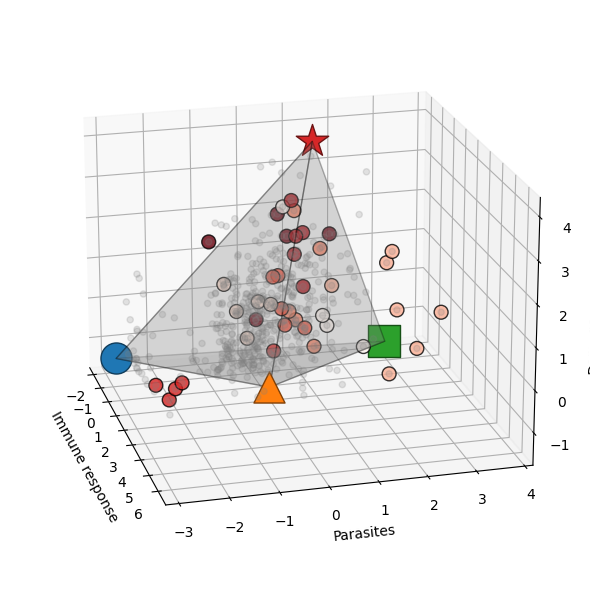

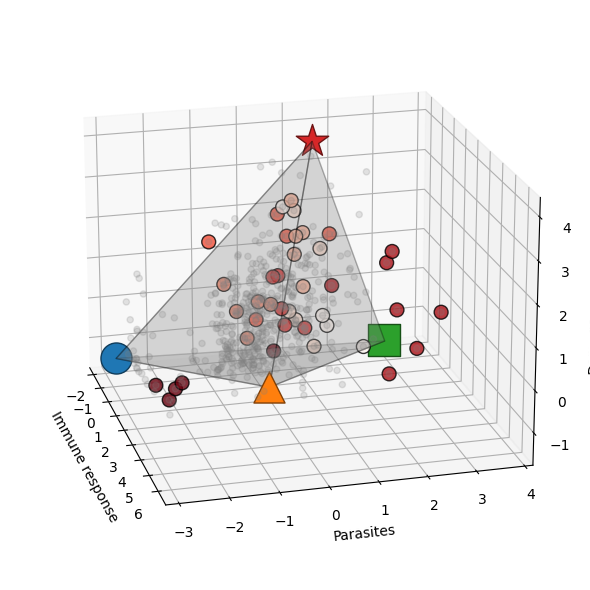

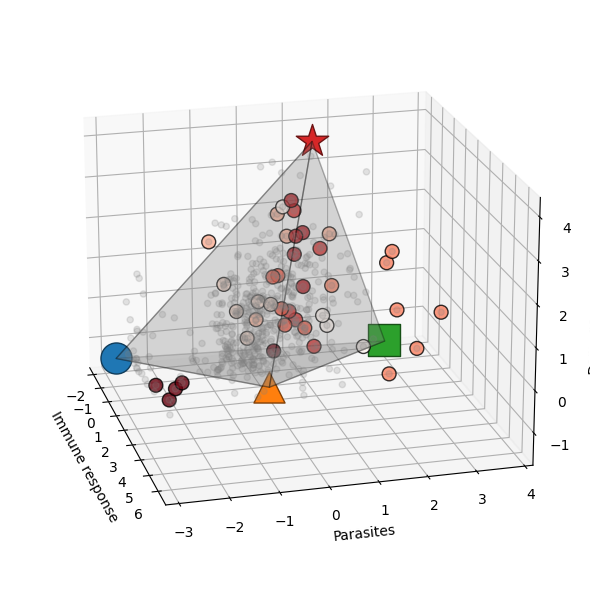

In [23]:
for o in others:
    if 'weight' in o:
        print(o)
        df_parents = df_parents.sort_values(by = o)
        unique_values = df_parents[o].unique()
        num_unique = len(unique_values)
        colormap = plt.cm.get_cmap('Reds_r', num_unique)
        color_map = {value: mcolors.to_hex(colormap(i)) for i, value in enumerate(unique_values)}
        
        # Map the colors to the DataFrame column
        row_colors = df_parents[o].map(color_map)

        # Convert the resulting Series to a NumPy array (optional)
        colors_o = row_colors.to_numpy()
        for D_name,D_lab in zip(Ds,D_labels):
            
            fig = plt.figure(figsize=(8, 6))
            ax = fig.add_subplot(111, projection='3d')
            damage_col_name = f'Max.{D_name}.Delta.zscore'
            MDI = np.array([df_maxs['Max.Parasitemia.zscore'],df_maxs[damage_col_name],df_maxs['Immune.Intensity.zscore']]).transpose()
            M = df_maxs['Max.Parasitemia.zscore']
            M_parents = df_parents['Max.Parasitemia.zscore']
            D = df_maxs[damage_col_name]
            D_parents = df_parents[damage_col_name]
            I = df_maxs['Immune.Intensity.zscore']
            I_parents = df_parents['Immune.Intensity.zscore']

            XC, S, C, SSE, varexpl = PCHA(MDI.transpose(), noc=4, delta=0.1)
            arcs = np.array(XC.transpose())
            arcs = sort_archetypes(arcs)
            arc1 = arcs[0]
            arc2 = arcs[1]
            arc3 = arcs[2]
            arc4 = arcs[3]

            ax.set_xlabel('Immune response')
            ax.set_ylabel('Parasites')
            ax.set_zlabel('Damage')
            ax.scatter(I, M,D,c='grey',alpha = 0.2,zorder = -1)
            plot_archetypes_3d(arcs,ax)
            ax.scatter(I_parents,M_parents,D_parents,c = colors_o, s = 100,cmap = 'Reds',edgecolors = 'black',zorder = 0,alpha = 0.8)
            #ax.set_xlim(min(arcs[:,2].min(),I.min())*1.3,max(arcs[:,2].max(),I.max())*1.15)
            #ax.set_ylim(min(arcs[:,0].min(),M.min())*1.3,max(arcs[:,0].max(),M.max())*1.15)
            #ax.set_zlim(min(arcs[:,1].min(),M.min())*1.3,max(arcs[:,1].max(),M.max())*1.15)

            df_o = df_parents.copy()
            df_o['color'] = colors_o
            df_o = df_o.sort_values(by = o)
            print(df_o[['Strain','color',o]].to_string())
            ax.view_init(elev=20., azim=-15, roll=0)
            vertices_tr1 = [[arc1[2],arc1[0],arc1[1]],[arc2[2],arc2[0],arc2[1]],[arc3[2],arc3[0],arc3[1]]]
            vertices_tr2 = [[arc1[2],arc1[0],arc1[1]],[arc2[2],arc2[0],arc2[1]],[arc4[2],arc4[0],arc4[1]]]
            vertices_tr3 = [[arc3[2],arc3[0],arc3[1]],[arc2[2],arc2[0],arc2[1]],[arc4[2],arc4[0],arc4[1]]]
            vertices_tr4 = [[arc1[2],arc1[0],arc1[1]],[arc1[2],arc1[0],arc1[1]],[arc4[2],arc4[0],arc4[1]]]
            from mpl_toolkits.mplot3d.art3d import Poly3DCollection

            ax.add_collection3d(Poly3DCollection([vertices_tr1], color='grey', alpha=0.2,zorder = -1,edgecolor = 'black'))
            ax.add_collection3d(Poly3DCollection([vertices_tr2], color='grey', alpha=0.3,zorder = 0,edgecolor = 'black'))
            ax.add_collection3d(Poly3DCollection([vertices_tr3], color='grey', alpha=0.3,zorder = 0,edgecolor = 'black'))
            ax.add_collection3d(Poly3DCollection([vertices_tr4], color='grey', alpha=0.2,zorder = -1,edgecolor = 'black'))

            fig.tight_layout()
            
            fig.savefig(f'SI_4_D_{D_name}_other_infection_{o}.png',dpi = 600,bbox_inches = 'tight')
            fig.savefig(f'SI_4_D_{D_name}_other_infection_{o}.pdf',dpi = 600,bbox_inches = 'tight')

;            plt.show()

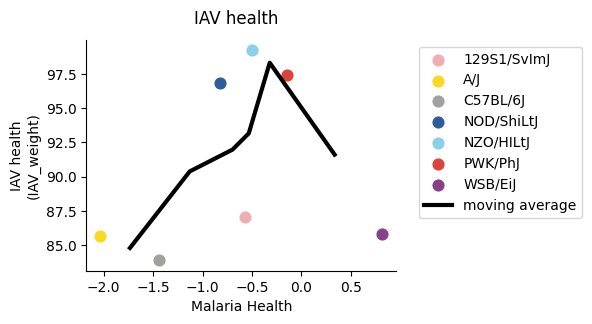

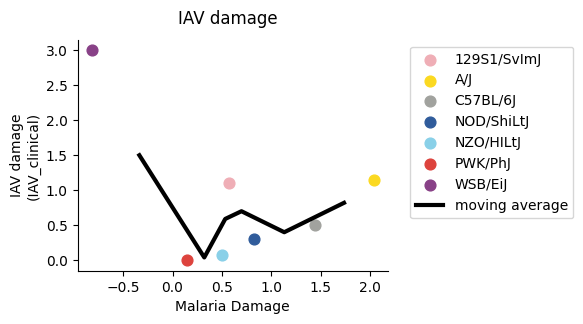

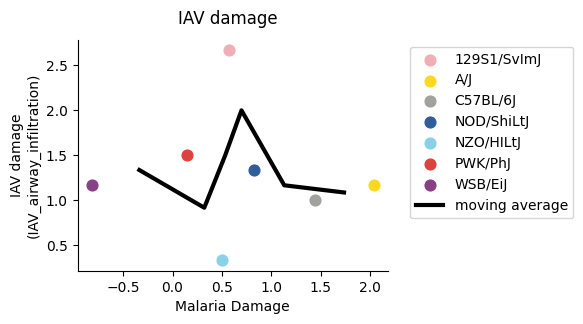

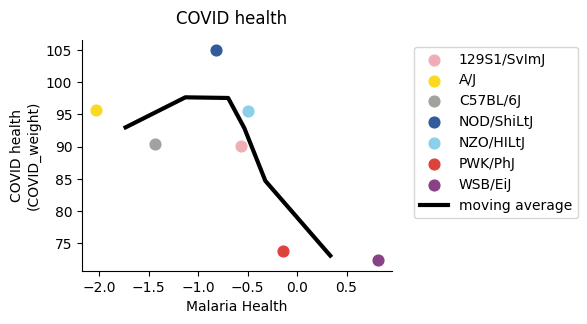

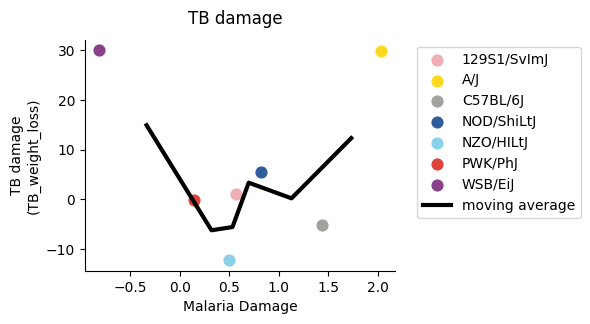

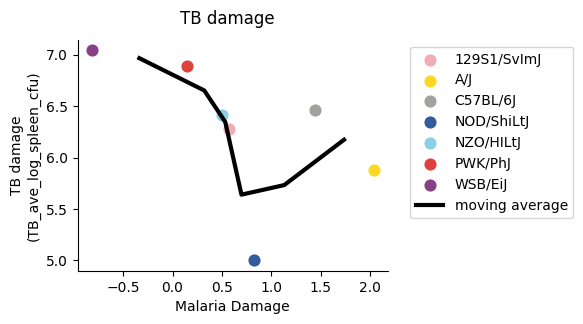

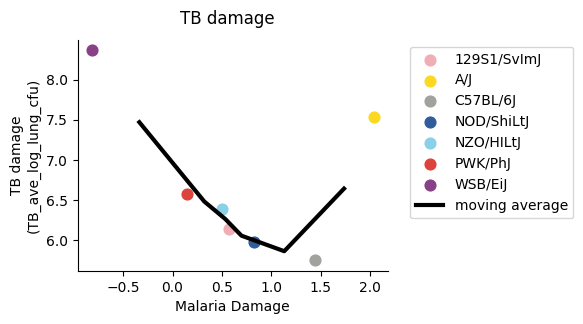

In [89]:
others = ['IAV_weight','IAV_clinical','IAV_airway_infiltration','COVID_weight','TB_weight_loss','TB_ave_log_spleen_cfu','TB_ave_log_lung_cfu']
%matplotlib inline
colors_dict = {'A/J':'#fbd921', 'C57BL/6J':'#a1a29e','C57BL/6':'#a1a29e', '129S1/SvImJ':'#efaeb6',
               'NOD/ShiLtJ':'#305c9b','NZO/HILtJ':'#89d0e8','PWK/PhJ':'#dd433d',
                'CAST/EiJ':'#4eaf47','WSB/EiJ':'#884187','DO':'#cfcec8'}

for o in others:
    fig,ax = plt.subplots(figsize = (4,3))
    disease = o.split('_')[0]
    df_strain_mean_disease = pd.DataFrame(columns=['x','y'])
    if o=='IAV_weight' or o=='COVID_weight':
        for strain, strain_data in df_parents.groupby('Strain'):
                if strain != 'CAST/EiJ':
                    ax.scatter(-strain_data['Max.Weight.Delta.zscore'].mean(),strain_data[o].mean(),label = strain,s = 60,c = colors_dict[strain])
                    #ax.errorbar(-strain_data['Max.Weight.Delta.zscore'].mean(),strain_data[o].mean(), xerr=strain_data['Max.Weight.Delta.zscore'].std(), label=strain,marker = '.',markersize = 20)

                    df_strain_mean_disease = pd.concat([df_strain_mean_disease,pd.DataFrame({'x':[-strain_data['Max.Weight.Delta.zscore'].mean()],'y':[strain_data[o].mean()]})],ignore_index=True)

        ax.set_xlabel('Malaria Health')
        ax.set_ylabel(disease+' health\n('+o+')')
        fig.suptitle(disease+' health')

    else:
        for strain, strain_data in df_parents.groupby('Strain'):
            if strain != 'CAST/EiJ':
                if o=='TB_weight_loss':
                    ax.scatter(strain_data['Max.Weight.Delta.zscore'].mean(),-strain_data[o].mean(),label = strain,s = 60,c = colors_dict[strain])
                    #ax.errorbar(strain_data['Max.Weight.Delta.zscore'].mean(),-strain_data[o].mean(), xerr=strain_data['Max.Weight.Delta.zscore'].std(), label=strain,marker = '.',markersize = 20)
                    df_strain_mean_disease = pd.concat([df_strain_mean_disease,pd.DataFrame({'x':[strain_data['Max.Weight.Delta.zscore'].mean()],'y':[-strain_data[o].mean()]})],ignore_index=True)

                else:
                    ax.scatter(strain_data['Max.Weight.Delta.zscore'].mean(),strain_data[o].mean(),label = strain,s = 60,c = colors_dict[strain])
                    #ax.errorbar(strain_data['Max.Weight.Delta.zscore'].mean(),strain_data[o].mean(), xerr=strain_data['Max.Weight.Delta.zscore'].std(), label=strain,marker = '.',markersize = 20)
                    df_strain_mean_disease = pd.concat([df_strain_mean_disease,pd.DataFrame({'x':[strain_data['Max.Weight.Delta.zscore'].mean()],'y':[strain_data[o].mean()]})],ignore_index=True)
        ax.set_xlabel('Malaria Damage')
        ax.set_ylabel(disease+' damage\n('+o+')')
        fig.suptitle(disease+' damage')
    df_strain_mean_disease = df_strain_mean_disease.sort_values(by = 'x',ignore_index=True)
    y = df_strain_mean_disease['y']
    x = df_strain_mean_disease['x']
    running_mean_y = np.convolve(y, np.ones(2)/2, mode='valid')
    mean_x = [(x[i]+x[i-1])/2 for i in range(1,len(x))]
    ax.plot(mean_x,running_mean_y,color = 'black',lw = 3,label = 'moving average')
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1))
    ax.spines[['top','right']].set_visible(False)
    fig.savefig(f'/Users/yaelleb/Desktop/Documents/WIS/Alon Lab/Pathogen Response Project/Pathogen_Response_Project/Damage_Response_Network/figures/damage_corr_parent_strains/{o}.png',bbox_inches = 'tight')

In [66]:
%matplotlib qt
others = ['IAV_weight','IAV_clinical','IAV_airway_infiltration','COVID_weight','TB_weight_loss','TB_ave_log_spleen_cfu','TB_ave_log_lung_cfu']

for o in others:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    disease = o.split('_')[0]
    ax.set_xlabel('Malaria microbes')
    if o=='IAV_weight' or o=='COVID_weight':
        for strain, strain_data in df_parents.groupby('Strain'):
                if strain != 'CAST/EiJ':
                    ax.scatter(strain_data['Max.Parasitemia.zscore'],-strain_data['Max.Weight.Delta.zscore'],strain_data[o],label = strain,c = colors_dict[strain],s = 60)

        ax.set_ylabel('Malaria Health')
        ax.set_zlabel(disease+' health\n('+o+')')
        fig.suptitle(disease+' health')
    else:
        for strain, strain_data in df_parents.groupby('Strain'):
            if strain != 'CAST/EiJ':
                    ax.scatter(strain_data['Max.Parasitemia.zscore'],strain_data['Max.Weight.Delta.zscore'],strain_data[o],label = strain,c = colors_dict[strain],s = 60)
        ax.set_ylabel('Malaria Damage')
        ax.set_zlabel(disease+' damage\n('+o+')')
        fig.suptitle(disease+' damage')
    ax.legend()


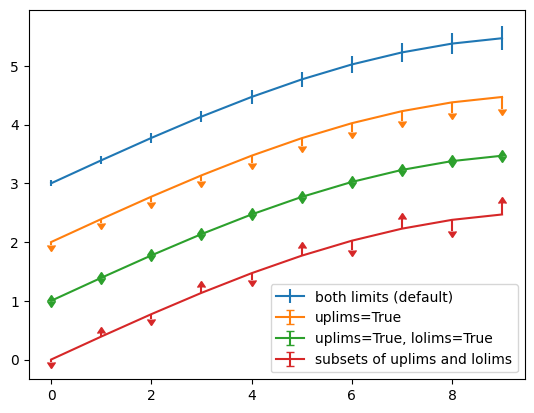

In [58]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')
